In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2023-11-28 20:25:15.172037: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-28 20:25:15.172140: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-28 20:25:15.172289: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-28 20:25:15.385915: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Preparing The Data

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    channel_shift_range=0.1,
    brightness_range=[0.8, 1.2],
)

train_generator = datagen.flow_from_directory(
    'train',
    target_size=(150, 150),
    batch_size=8,
	class_mode='categorical')

valid_generator = datagen.flow_from_directory(
    'valid',
    target_size=(150, 150),
    batch_size=8,
	class_mode='categorical')

Found 8922 images belonging to 23 classes.
Found 853 images belonging to 23 classes.


# Training The Model


In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(23, activation='softmax')
])

2023-11-26 23:38:41.036342: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3394 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 950M, pci bus id: 0000:01:00.0, compute capability: 5.0


In [4]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [5]:
epochs=10
history = model.fit(
  train_generator,
  validation_data=valid_generator,
  epochs=epochs
)

Epoch 1/10


2023-11-26 23:38:43.228153: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-11-26 23:38:43.279343: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-26 23:38:43.566734: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-26 23:38:43.662046: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1c540fe0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-26 23:38:43.662080: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 950M, Compute Capability 5.0
2023-11-26 23:38:43.670013: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-26 23:38:43.884886: I ./tensorflow/compiler/jit/device_compiler

1116/1116 [==============================] - 139s 120ms/step - loss: 2.7092 - accuracy: 0.1886 - val_loss: 2.1704 - val_accuracy: 0.3857
Epoch 2/10
1116/1116 [==============================] - 136s 122ms/step - loss: 1.6768 - accuracy: 0.4895 - val_loss: 1.3071 - val_accuracy: 0.6166
Epoch 3/10
1116/1116 [==============================] - 133s 119ms/step - loss: 1.0205 - accuracy: 0.6871 - val_loss: 0.8570 - val_accuracy: 0.7597
Epoch 4/10
1116/1116 [==============================] - 124s 111ms/step - loss: 0.7118 - accuracy: 0.7783 - val_loss: 0.7305 - val_accuracy: 0.8206
Epoch 5/10
1116/1116 [==============================] - 122s 109ms/step - loss: 0.5601 - accuracy: 0.8299 - val_loss: 0.7993 - val_accuracy: 0.7960
Epoch 6/10
1116/1116 [==============================] - 126s 113ms/step - loss: 0.4566 - accuracy: 0.8596 - val_loss: 0.7995 - val_accuracy: 0.8195
Epoch 7/10
1116/1116 [==============================] - 129s 115ms/step - loss: 0.3928 - accuracy: 0.8801 - val_loss: 0.535

# Evaluating The Model

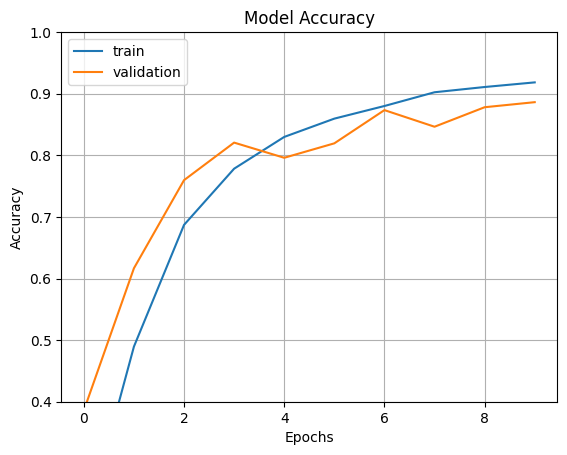

In [10]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

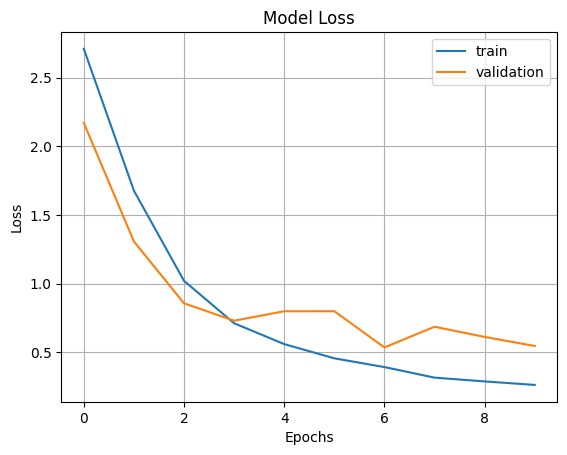

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Making Predictions

In [2]:
import numpy as np

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions)]
    confidence = round(100 * (np.max(predictions)), 2)
    return predicted_class, confidence

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    channel_shift_range=0.1,
    brightness_range=[0.8, 1.2],
)

In [6]:
test_generator = datagen.flow_from_directory(
    'test',
    target_size=(150, 150),
    batch_size=8,
	class_mode='categorical')

Found 440 images belonging to 23 classes.


In [7]:
class_names = list(test_generator.class_indices.keys())
print(class_names)

['abdominal-machine', 'arm-curl', 'arm-extension', 'back-extension', 'back-row-machine', 'bench-press', 'cable-lat-pulldown', 'chest-fly', 'chest-press', 'dip-chin-assist', 'hip-abduction-adduction', 'incline-bench', 'lat-pulldown', 'leg-extension', 'leg-press', 'lying-down-leg-curl', 'overhead-shoulder-press', 'pulley-machine', 'seated-cable-row', 'seated-leg-curl', 'smith-machine', 'squat-rack', 'torso-rotation-machine']


In [9]:
model = tf.keras.models.load_model('gym_equipment_v3')

2023-11-28 20:27:36.459663: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3394 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 950M, pci bus id: 0000:01:00.0, compute capability: 5.0
2023-11-28 20:27:36.962307: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 37879808 exceeds 10% of free system memory.
2023-11-28 20:27:37.052644: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 37879808 exceeds 10% of free system memory.
2023-11-28 20:27:37.219455: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 37879808 exceeds 10% of free system memory.


1/1 [==============================] - 0s 27ms/step


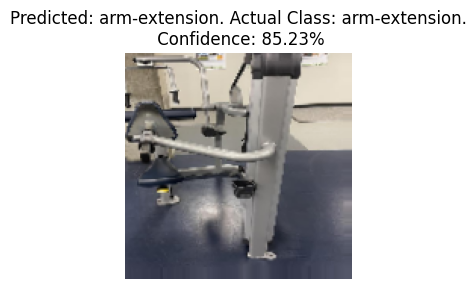

In [33]:
plt.figure(figsize=(10, 10))
for images, labels in test_generator:
    for i in range(1):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])

        plt.title(f"Predicted: {predicted_class}. Actual Class: {class_names[np.argmax(labels[i])]}.\n Confidence: {confidence}%")
        plt.axis("off")
    break

In [34]:
model.save("gym_equipment.keras")

2023-11-28 20:31:53.437908: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 37879808 exceeds 10% of free system memory.


In [35]:
model = tf.keras.models.load_model('gym_equipment_v3.keras')

2023-11-28 20:32:51.520703: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 37879808 exceeds 10% of free system memory.


In [18]:
# save as h5 file
model.save_weights('gym_equipment.h5')

In [19]:
# save as directory
model.save('gym_equipment')

INFO:tensorflow:Assets written to: gym_equipment/assets


INFO:tensorflow:Assets written to: gym_equipment/assets


In [20]:
# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open("gym_equipment.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpa9l_bred/assets


INFO:tensorflow:Assets written to: /tmp/tmpa9l_bred/assets
2023-11-27 00:06:13.800612: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2023-11-27 00:06:13.800654: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2023-11-27 00:06:13.801584: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpa9l_bred
2023-11-27 00:06:13.806396: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2023-11-27 00:06:13.806464: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /tmp/tmpa9l_bred
2023-11-27 00:06:13.813736: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:382] MLIR V1 optimization pass is not enabled
2023-11-27 00:06:13.816259: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2023-11-27 00:06:14.060356: I tensorflow/cc/saved_model/loader.cc:217] Running initializatio